# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read & Endcoded  Data set

In [2]:
df = pd.read_csv('salmon_seabass.csv')

# both species are endcoded in the data set as follows:
#   0 ... salmon
#   1 ... sea bass
df.loc[(df.species == 0),'species_desc'] = 'Salmon'
df.loc[(df.species == 1),'species_desc'] = 'Sea Bass'

df

,index,lightness,width,species,species_desc
0,0,2.834754,21.087143,0,Salmon
1,1,3.329180,18.877143,0,Salmon
2,2,3.690492,19.824286,0,Salmon
3,3,4.812459,17.760000,0,Salmon
4,4,4.812459,16.497143,0,Salmon
...,...,...,...,...,...
126,126,8.976774,18.656940,1,Sea Bass
127,127,5.365806,21.308897,1,Sea Bass
128,128,6.226452,20.203915,1,Sea Bass
129,129,8.789677,16.054093,1,Sea Bass


# Data output Plot (Histogram, Category)

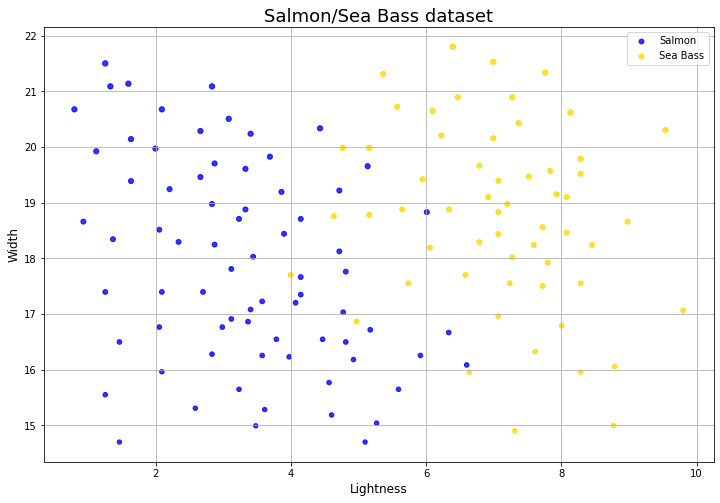

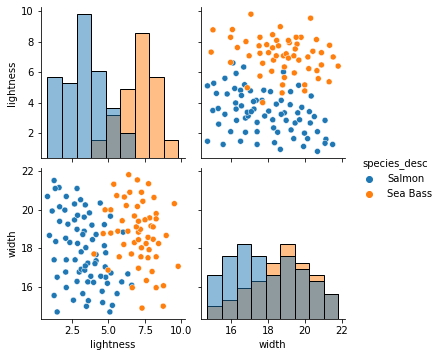

In [3]:
data_to_plot = [df[df.species==0], df[df.species==1]]

plt.figure(figsize=(12, 8))

for i, data in enumerate(data_to_plot):
    #print(data)
    plt.scatter(x=data.lightness, y=data.width, c=['blue','gold'][i], s=data.width**1.1,label=['Salmon','Sea Bass'][i], alpha=0.8)

plt.title("Salmon/Sea Bass dataset", fontsize=18)
plt.xlabel('Lightness', fontsize=12)
plt.ylabel('Width', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


sns.pairplot(data=df.drop(['species', 'index'], axis=1), hue='species_desc', diag_kind='hist')
plt.savefig('pairplot.png')

# RGB Historgam

<AxesSubplot:ylabel='Frequency'>

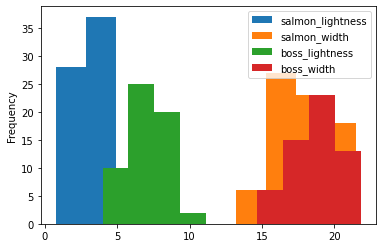

In [4]:
df_salmon=df[df.species==0]
df_boss=df[df.species==1]

df_salmon=df_salmon[['lightness','width']]
df_salmon.columns=['salmon_lightness','salmon_width']

df_boss=df_boss[['lightness','width']]
df_boss.columns=['boss_lightness','boss_width']

#df_boss.reset_index(drop=True)

ax=df_salmon.plot.hist()
df_boss.plot.hist(ax=ax)

# Imort model From Sklearn Library

In [5]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Delete column

In [6]:
df = df.drop(['index', 'species_desc'], axis=1)

# Call models with scikit-learn

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

# Data evaluation and Compare Machine Learning Algorithms with scikit-learn

In [8]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, df.drop('species', axis=1).values,
                                                 df['species'].values,
                                                 cv=kfold,
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = " Model %s: Overal accurarcy is %f %% (with standard deviation %f)" % (name, cv_results.mean()*100,
                                                                                 cv_results.std())
    print(msg)

 Model LR: Overal accurarcy is 91.538462 % (with standard deviation 0.121383)
 Model LDA: Overal accurarcy is 92.307692 % (with standard deviation 0.103203)
 Model KNN: Overal accurarcy is 89.230769 % (with standard deviation 0.124985)
 Model CART: Overal accurarcy is 83.186813 % (with standard deviation 0.123258)
 Model NB: Overal accurarcy is 90.769231 % (with standard deviation 0.113053)
 Model RF: Overal accurarcy is 90.000000 % (with standard deviation 0.114354)
 Model SVM: Overal accurarcy is 92.307692 % (with standard deviation 0.084265)


# The result of comparing algorithms

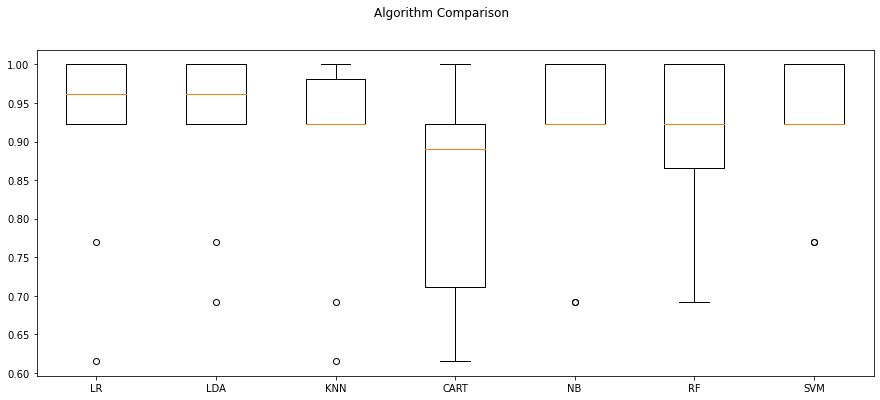

In [9]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('all_models.png')
plt.show()